In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('C:/Users/victus/Data_Science/New folder/EDA2/adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#Summary statistics
df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [4]:
#Missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [5]:
#Data types
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [6]:
# Handle missing values (assuming '?' marks missing in this dataset)
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [7]:
# Identify numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include='object').columns
categorical_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [8]:
# 2. Scaling techniques
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df_standard_scaled = df.copy()
df_standard_scaled[numerical_features] = scaler_standard.fit_transform(df[numerical_features])
df_standard_scaled[numerical_features]

df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_features] = scaler_minmax.fit_transform(df[numerical_features])
df_minmax_scaled[numerical_features]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [9]:
# 3. Encoding
df_encoded = df.copy()

# One-Hot for categorical variables with < 5 categories
one_hot_cols = [col for col in categorical_features if df[col].nunique() < 5]
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols)

# Label Encoding for other categorical variables
label_enc = LabelEncoder()
label_cols = [col for col in categorical_features if col not in one_hot_cols]
for col in label_cols:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])
df_encoded[col]

0        39
1        39
2        39
3        39
4         5
         ..
32556    39
32557    39
32558    39
32559    39
32560    39
Name: native_country, Length: 32561, dtype: int32

In [10]:
# 4. Feature Engineering
df_encoded['age_per_education'] = df_encoded['age'] / (df_encoded['education_num'] + 1)
df_encoded['capital_total'] = df_encoded['capital_gain'] - df_encoded['capital_loss']
df_encoded['capital_total']


0         2174
1            0
2            0
3            0
4            0
         ...  
32556        0
32557        0
32558        0
32559        0
32560    15024
Name: capital_total, Length: 32561, dtype: int64

In [11]:

# Log transformation on skewed numerical feature
df_encoded['capital_gain'] = np.log1p(df_encoded['capital_gain'])
df_encoded['capital_gain']

0        7.684784
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32556    0.000000
32557    0.000000
32558    0.000000
32559    0.000000
32560    9.617471
Name: capital_gain, Length: 32561, dtype: float64

In [12]:
# 5. Outlier removal using Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(df_encoded[numerical_features])
df_no_outliers = df_encoded[outliers == 1]
df_no_outliers



,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_per_education,capital_total
0,39,7,77516,9,13,4,1,1,4,7.684784,0,40,39,False,True,True,False,2.785714,2174
1,50,6,83311,9,13,2,4,0,4,0.000000,0,13,39,False,True,True,False,3.571429,0
2,38,4,215646,11,9,0,6,1,4,0.000000,0,40,39,False,True,True,False,3.800000,0
3,53,4,234721,1,7,2,6,0,2,0.000000,0,40,39,False,True,True,False,6.625000,0
4,28,4,338409,9,13,2,10,5,2,0.000000,0,40,5,True,False,True,False,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0.000000,0,38,39,True,False,True,False,2.076923,0
32557,40,4,154374,11,9,2,7,0,4,0.000000,0,40,39,False,True,False,True,4.000000,0
32558,58,4,151910,11,9,6,1,4,4,0.000000,0,40,39,True,False,True,False,5.800000,0
32559,22,4,201490,11,9,4,1,3,4,0.000000,0,20,39,False,True,True,False,2.200000,0


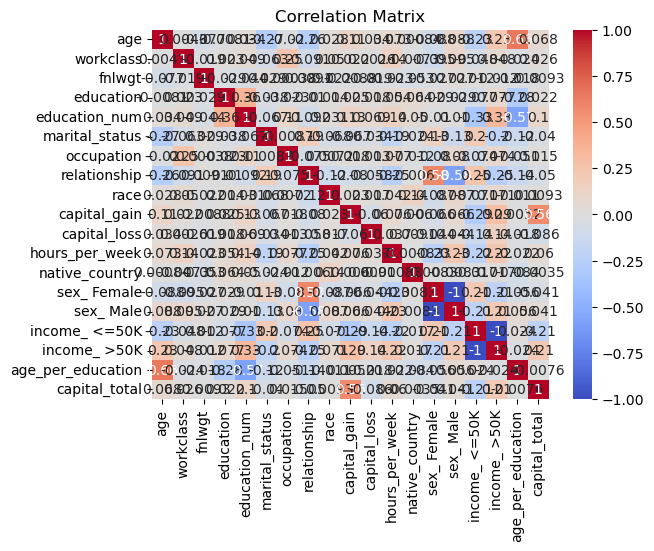

In [13]:
# Compare with correlation matrix
correlation_matrix = df_no_outliers.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()